# CH4. 회귀와 예측 (Regression and Prediction)

## 4.1 단순선형회귀
- 상관관계: 두 변수 사이의 전체적인 관련 강도를 측정하는 것
- 회귀: 관련 자체를 <b>정량화</b>하는 방법

=============================================================================================================
###### 용어정리
- 응답변수(반응변수, response variable): 예측하고자 하는 변수(유의어: 종속변수, 변수 $Y$, 목표, 출력)
- 독립변수(independent variable): 응답치를 예측하기 위해 사용되는 변수(유의어: 예측변수, 변수 $X$, 피처, 속성)
- 레코드(record): 한 특정 경우에 대한 입력과 출력을 담고 있는 벡터(유의어: 행, 사건, 예시(instance), 예제(example))
- 절편(intercept): 회귀직선의 절편. 즉, $X=0$일 때 예측값(유의어: $B_0, b_0$)
- 회귀계수(regression coefficient): 회귀직선의 기울기(유의어: 기울기(slope), $B_1, b_1$, 모수 추정값, 가중치)
- 적합값(fitted value): 회귀선으로부터 얻은 추정치 $\hat{Y}_i$(유의어: 예측값)
- 잔차(residual): 관측값과 적합값의 차이(유의어: 오차)
- 최소제곱(least square): 잔차 제곱합을 최소화하여 회귀를 피팅하는 방법(유의어: 보통최소제곱, OLS(Ordinary Least Squares))

=============================================================================================================

<b>*오차와 잔차*</b>
- 오차: 모집단으로부터 추정한 회귀식을 통해 얻은 예측값과 실제값의 차이
- 잔차: 표본집단으로부터 추정한 회귀식을 통해 얻은 예측값과 실제값의 차이

*참고자료*
*https://jangpiano-science.tistory.com/116*

### 4.1.1 회귀식
- 회귀식: $Y = b_0 + b_1X$ 
- $b_0$: 절편(상수)
- $b_1$: 계수(coefficient)
- $Y$: 응답변수 혹은 종속변수 / 목표벡터(머신러닝 분야)
- $X$: 독립변수 혹은 예측변수 / 피처벡터(머신러닝 분야)

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import statsmodels.api as sm

# pip install dmba
from dmba import stepwise_selection
from dmba import AIC_score

In [2]:
lung = pd.read_csv('C:/data/stats_for_ds/LungDisease.csv'); lung

,PEFR,Exposure
0,390,0
1,410,0
2,430,0
3,460,0
4,420,1
...,...,...
117,450,22
118,490,22
119,500,22
120,370,23


In [10]:
predictors = ['Exposure'] 
outcome = 'PEFR'

model = LinearRegression()
model.fit(lung[predictors], lung[outcome])
                                 
print(f'Intercept: {model.intercept_:.3f}')
print(f'Coefficient Exposure: {model.coef_[0]:.3f}')

Intercept: 424.583
Coefficient Exposure: -4.185


In [11]:
# lung['Exposure']과 lung[['Exposure']]의 차이
# lung['Exposure']
# lung[['Exposure']]

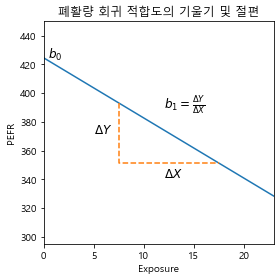

In [19]:
## [그림 4-2] 폐활량 회귀 적합도의 기울기 및 절편
fig, ax = plt.subplots(figsize=(4, 4))

ax.set_xlim(0, 23)
ax.set_ylim(295, 450)
ax.set_xlabel('Exposure')
ax.set_ylabel('PEFR')
ax.plot((0, 23), model.predict([[0], [23]]))
ax.text(0.4, model.intercept_, r'$b_0$', size='larger')

x = [[7.5], [17.5]]
y = model.predict(x)
ax.plot((7.5, 7.5, 17.5), (y[0], y[1], y[1]), '--')
ax.text(5, np.mean(y), r'$\Delta Y$', size='larger')
ax.text(12, y[1] - 10, r'$\Delta X$', size='larger')
ax.text(12, 390, r'$b_1 = \frac{\Delta Y}{\Delta X}$', size='larger')
ax.set_title('폐활량 회귀 적합도의 기울기 및 절편')

plt.tight_layout()
plt.show()

### 4.1.2 적합값과 잔차
- 오차항 $e_i$: 모든 데이터가 정확히 한 직선 안에 들어오지는 않는다. 따라서 회귀식은 명시적으로 오차항을 포함한다. <br><br>
                                                          
 $$Y_i = b_0 + b_1X + e_i$$ 

- $\hat{Y}_i$: 적합값(예측값)
- $\hat{b}_0, \hat{b}_1$: 추정을 통해 얻은 값을 의미 

 $$\hat{Y}_i = \hat{b}_0 + \hat{b}_1X_i $$ 
- $\hat{e}_i$: 잔차 

 $$\hat{e}_i = Y - \hat{Y}_i$$

In [13]:
fitted = model.predict(lung[predictors])
residuals = lung[outcome] - fitted

print(fitted, residuals)

[424.58280657 424.58280657 424.58280657 424.58280657 420.39823009
 416.2136536  416.2136536  416.2136536  412.02907712 412.02907712
 412.02907712 412.02907712 412.02907712 412.02907712 407.84450063
 407.84450063 407.84450063 407.84450063 407.84450063 407.84450063
 403.65992415 399.47534766 399.47534766 399.47534766 399.47534766
 399.47534766 395.29077118 395.29077118 395.29077118 395.29077118
 395.29077118 395.29077118 395.29077118 391.10619469 386.9216182
 382.73704172 382.73704172 382.73704172 374.36788875 374.36788875
 370.18331226 370.18331226 370.18331226 370.18331226 370.18331226
 370.18331226 370.18331226 370.18331226 365.99873578 365.99873578
 365.99873578 365.99873578 365.99873578 365.99873578 361.81415929
 361.81415929 361.81415929 357.62958281 357.62958281 353.44500632
 353.44500632 353.44500632 353.44500632 353.44500632 353.44500632
 349.26042984 349.26042984 349.26042984 349.26042984 345.07585335
 345.07585335 345.07585335 345.07585335 345.07585335 345.07585335
 345.075853

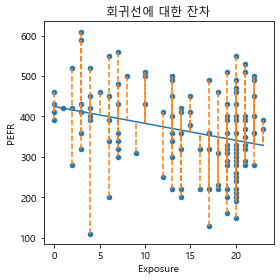

In [23]:
## [그림 4-3] 회귀선에 대한 잔차
ax = lung.plot.scatter(x='Exposure', y='PEFR', figsize=(4, 4))
ax.plot(lung.Exposure, fitted)
for x, yactual, yfitted in zip(lung.Exposure, lung.PEFR, fitted): 
    ax.plot((x, x), (yactual, yfitted), '--', color='C1')

ax.set_title('회귀선에 대한 잔차')

plt.tight_layout()
plt.show()

### 4.1.3 최소제곱

- 최소제곱법: 잔차제곱합(RSS, residual sum of squares)을 최소화하는 선으로 회귀선을 추정하는 방법 (유의어:최소제곱회귀, 보통최소제곱, OLS)

$$ RSS = \sum_i^N (Y_i - \hat{Y}_i)^2 = \sum_i^N (Y_i - \hat{b}_0 - \hat{b}_iX_i)^2 $$

### 4.1.4 예측 대 설명(프로파일링)


###### 주요개념
- 회귀방정식은 응답변수 $Y$와 예측변수 $X$간의 관계를 선형함수로 모델링한다.
- 회귀모형은 적합값과 잔차, 즉 반응에 대한 예측과 그 예측 오차를 산출한다.
- 회귀모형은 일반적으로 최소제곱법을 이용해 피팅한다.
- 회귀는 예측과 설명 모두에 사용된다.

## 4.2 다중선형회귀
- 예측변수가 여러개인 경우
- 더 이상 직선의 형태는 아니지만, 각 계수와 그 변수(특징)들 사이의 관계는 여전이 선형이므로 선형모형이다.

$$ Y = b_0 + b_1X_1 + b_2X_2 + ... b_pX_p + e $$

- 다른 모든 변수 $X_k(k =!= j)$가 고정되었다고 가정했을 때, $X_j$가 변하는 정도에 따라 예측값 $\hat{Y}$도 $b_j$에 비례해 변화한다.

===========================================================================================================
###### 용어정리
- 제곱근평균제곱오차(RMSE, root mean squared error): 회귀 시 평균제곱오차의 제곱근. 회귀모형을 평가하는 데 가장 널리 사용되는 측정 지표
- 잔차 표준오차(RSE, residual standard error): 평균제곱오차(MSE)와 동일하지만 자유도에 따라 보정된 값
- $R^2$(r-squared): 0에서 1까지 모델에 의해 설명된 분산의 비율(유의어: 결정계수(coefficient of determination, R 제곱)
- t-statistic(t 통계량): 계수의 표준오차로 나눈 예측변수의 계수, 모델에서 변수의 중요도를 비교하는 기준이 된다.
- 가중회귀(weighted regression): 다른 가중치를 가진 레코드들을 회귀하는 방법

===========================================================================================================

### 4.2.1 킹 카운티 주택 정보 예제


In [4]:
# 예제: 판매 금액 예측
subset = ['AdjSalePrice', 'SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']

house = pd.read_csv('C:/data/stats_for_ds/house_sales.csv', sep='\t')
print(house[subset].head())

   AdjSalePrice  SqFtTotLiving  SqFtLot  Bathrooms  Bedrooms  BldgGrade
1      300805.0           2400     9373       3.00         6          7
2     1076162.0           3764    20156       3.75         4         10
3      761805.0           2060    26036       1.75         4          8
4      442065.0           3200     8618       3.75         5          7
5      297065.0           1720     8620       1.75         4          7


In [5]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

house_lm = LinearRegression()
house_lm.fit(house[predictors], house[outcome])

print(f'Intercept: {house_lm.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(predictors, house_lm.coef_):
    print(f' {name}: {coef}')

Intercept: -521871.368
Coefficients:
 SqFtTotLiving: 228.8306036024074
 SqFtLot: -0.06046682065303883
 Bathrooms: -19442.840398321023
 Bedrooms: -47769.95518521431
 BldgGrade: 106106.96307898095


### 4.2.2 모형 평가
- RMSE(제곱근평균제곱오차): 예측된 $\hat{y}_i$값들의 평균제곱오차의 제곱근
- RMSE를 활용하여 전반적인 모델의 정확도를 측정하고 다른 모델(ML로 학습된 모델 포함)과 비교하기 위한 기준이 된다.

$$ RMSE = \sqrt{ \frac{ \sum_i^n(y_i - \hat{y}_i)^2} {n} } $$

- RSE(잔차표준오차) ($p$ = 예측변수의 갯수)
- 분모가 데이터 수가 아닌 자유도

$$ RSE = \sqrt { \frac {\sum_i^n(y_i - \hat{y}_i)^2) } { (n-p-1) } } $$

- 실무에서 선형회귀분석을 할 때, $RMSE$와 $RSE$의 차이는 아주 작다. 특히 빅데이터 분야에서는 더 그렇다

In [9]:
from sklearn.metrics import r2_score, mean_squared_error

In [32]:
fitted = house_lm.predict(house[predictors])
RMSE = np.sqrt(mean_squared_error(house[outcome], fitted))
r2 = r2_score(house[outcome], fitted)
print(f'RMSE: {RMSE:.0f}')
print(f'r2: {r2:.4f}')

RMSE: 261220
r2: 0.5406


In [10]:
# 회귀모형에 대한 더 자세한 분석을 하려면 statsmodels를 사용
import statsmodels.api as sm

In [36]:
model = sm.OLS(house[outcome], house[predictors].assign(const=1)) # assign메서드는 값이 1인 상수열을 예측변수에 추가. 절편 모델링을 위해 필요
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     5338.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):               0.00
Time:                        09:42:41   Log-Likelihood:            -3.1517e+05
No. Observations:               22687   AIC:                         6.304e+05
Df Residuals:                   22681   BIC:                         6.304e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
SqFtTotLiving   228.8306      3.899     58.694

- <b> 결정계수($R^2$) </b>
 - 0 ~ 1 사이의 값으로 모델 데이터의 변동률을 측정. 
 - 모델이 데이터에 얼마나 적합한지 평가하고자 할 때, 회귀분석을 설명하기 위한 용도로 활용

$$ R^2 = 1 - \frac {\sum_i^n (y_i - \hat{y}_i)^2 } {\sum_i^n (y_i - \bar{y}_i)^2 } $$

- <b> 수정된 결정계수 (adjusted R-squared, $R_a^2$) </b>
 - 더 많은 예측변수를 추가하는 것에 대해 효과적으로 페널티를 가한다.
 - 큰 데이터 집합에 대한 다중회귀분석에서 일반 R 제곱과 크게 다르지 않다. <br>


- <b> t-statistic, 계수의 표준오차(SE) </b>
 $$ t_b = \frac {\hat{b}} {SE(\hat{b})} $$

### 4.2.3 교차타당성 검사
- <b> 교차타당성검사(cross-validation) </b>
 - 홀드아웃 샘플 아이디어를 여러 개의 연속된 홀드아웃 샘플로 확장한 것 
 
 <br>
 
- <b> 기본적인 k-fold cross-validation 알고리즘 </b> <br>
  1. 1/$k$개의 데이터를 홀드아웃 샘플로 따로 뗴어놓는다.
  2. 남아있는 데이터로 모델을 훈련시킨다.
  3. 모델을 1/$k$ 홀드아웃에 적용 (점수를 매김)하고 필요한 모델 평가 지표를 기록한다.
  4. 데이터의 첫 번째 1/$k$를 복원하고 다음 1/$k$(앞에서 선택했던 레코드는 제외)을 따로 보관한다.
  5. 2~3단계를 반복한다.
  6. 모든 레코드가 홀드아웃 샘플로 사용될 때까지 반복한다.
  7. 모델 평가 지표들을 평균과 같은 방식으로 결합한다.
  
 *훈련을 위한 샘플과 홀드아웃 샘플로 데이터를 나누는 것을 fold라고 한다.*

### 4.2.4 모형 선택 및 단계적 회귀
- 예측변수의 수를 추가한다고 해서 꼭 더 좋은 모델을 얻는것은 아니다.
- 통계학자들은 모델 선택을 위한 지침으로 <b>오컴의 면도날</b> 원리를 사용한다. 모든 것이 동일한 조건에서는, 복잡한 모델보다 단순한 모델을 우선 사용해야 한다는 원리이다.

In [12]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms',
              'BldgGrade', 'PropertyType', 'NbrLivingUnits',
              'SqFtFinBasement', 'YrBuilt', 'YrRenovated', 
              'NewConstruction']

X = pd.get_dummies(house[predictors], drop_first=True)
X['NewConstruction'] = [1 if nc else 0 for nc in X['NewConstruction']]

house_full = sm.OLS(house[outcome], X.assign(const=1))
results = house_full.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     2771.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):               0.00
Time:                        16:56:33   Log-Likelihood:            -3.1375e+05
No. Observations:               22687   AIC:                         6.275e+05
Df Residuals:                   22674   BIC:                         6.276e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
SqFtTotLiving       

- 모델 적합성을 함께 고려하는 방법: 

1. $Adjusted R-squre$ 활용 ($n$: 레코드 수, $P$:변수 수)

$$ R_a^2 = 1-(1-R^2) \frac{n-1} {n-P-1} $$

<br>

2. $AIC$(Akaike's information criteria): 모델에 항을 추가할수록 불이익을 주는 것
 - 다음은 회귀분석에서의 AIC 형식($n$: 레코드 수, $P$:변수 수)
 - 목표는 AIC를 최소화하는 모델을 찾는 것
 - k개 변수를 추가하면 2k만큼의 불이익을 받는다.
 
 $$ AIC = sP + n \log{RSS/n}$$
 
 ###### CAUTION_ $AIC, BIC$, 멜로즈 $C_p$
 AIC에 대한 수식은 살짝 이상할 수 있다. 하지만 사실 이 수식은 정보이론에서 나온 점진적 결론에 의한 것이다. AIC는 몇 가지 변형이 있다.
 - $AICc$: 크기가 작은 표본을 위해 수정된 $AIC$
 - $BIC$(Bayesian information criteria): $AIC$와 비슷하지만 변수 추가에 대해 더 강한 벌점을 주는 정보기준
 - 멜로즈 $C_p$: 콜린 링우드 멜로즈(Collin Lingwood Mallows)가 제안한 $AIC$ 변형
 <br>
 이들은 일반적으로 표본 내 측정 지표(즉, 훈련 데이터)로 보고되며, 모델 평가를 위해 홀드아웃 데이터를 사용하는 데이터 과학자들은 보통 이와 같은 표본 내 측정 지표들 사이의 차이나 이들을 뒷받침하는 이론에 대해 크게 걱정하지 않아도 된다.

<b>*최적의 회귀 모델을 찾는 방법*</b>
1. 부분집합회귀(all subset regression)
 - 모든 가능한 모델을 검색하는 방법
 - 계산 비용이 많이 들며, 대용량 데이터와 변수가 많은 문제에 적합하지 않다.
 
 <br>
 
2. 단계적 회귀(stepwise regression)
 - 부분집합회귀의 대안으로 <b>후진제거, 전진선택, 단계적 선택법</b>이 있다. <br>
 (1) 후진제거(Backward elimination): 전체 모델부터 시작하여 별로 의미 없는 변수들을 연속적으로 삭제 <br>
 (2) 전진선택(Forward Selection): 상수 모델에서 시작하여 연속적으로 변수 추가 <br>
 (3) 단계적 선택법(Bidiectional elimination): 예측변수를 연속적으로 추가/삭제하여 AIC를 낮추는 혹은 $R^2$을 높이는 모델을 찾을 수 있다. <br>
 
3. 벌점회귀(penalized regression)
 - 개념적으로 AIC와 유사
 - 개별 모델 집합들을 명시적으로 검색하는 대신 모델 적합 방정식에 많은 변수(파라미터)에 대해 모델에 불이익을 주는 제약조건 추가
 - 단계적, 전진석택, 후진제거와 달리 계수 크기를 감소시키거나 경우에 따라 거의 0으로 만들어 벌점을 적용
 - 많이 사용되는 방법으로는 <b>능형회귀, 라소</b>가 있다.
 
<br><br>

- 단계적 회귀분석과 모든 부분집합회귀는 표본 내 방법.
- 따라서, 새 데이터를 적용할 때 잘 맞지 않을 수 있음
- 이를 방지하기 위한 공통적인 접근법 중 하나는 <b>교차타당성검사</b>를 통해 모델의 유효성을 알아보는 것

In [4]:
# 사이킷런은 단계적 회귀를 구현해놓지 않았다
# dmba 패키지에는 stepwise_selection, forward_selection, backward_selection 함수를 구현했다.

from dmba import stepwise_selection
from dmba import AIC_score

In [13]:
y = house[outcome]

# 1. 주어진 변수 집합에 대해 적합 모델을 반환하는 함수
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(X[variables], y)
    return model

# 2.주어진 모델과 변수 세트에 대한 점수를 반환하는 함수 (dbma의 AIC_score 사용)
def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(y, [y.mean()] * len(y), model, df=1)
    return AIC_score(y, model.predict(X[variables]), model)

best_model, best_variables = stepwise_selection(X.columns, train_model, score_model, 
                                                verbose=True)

print()
print(f'Intercept: {best_model.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(best_variables, best_model.coef_):
    print(f' {name}: {coef}')

Variables: SqFtTotLiving, SqFtLot, Bathrooms, Bedrooms, BldgGrade, NbrLivingUnits, SqFtFinBasement, YrBuilt, YrRenovated, NewConstruction, PropertyType_Single Family, PropertyType_Townhouse
Start: score=647988.32, constant
Step: score=633013.35, add SqFtTotLiving
Step: score=630793.74, add BldgGrade
Step: score=628230.29, add YrBuilt
Step: score=627784.16, add Bedrooms
Step: score=627602.21, add Bathrooms
Step: score=627525.65, add PropertyType_Townhouse
Step: score=627525.08, add SqFtFinBasement
Step: score=627524.98, add PropertyType_Single Family
Step: score=627524.98, unchanged None

Intercept: 6178645.017
Coefficients:
 SqFtTotLiving: 199.2775530420154
 BldgGrade: 137159.5602262004
 YrBuilt: -3565.424939249331
 Bedrooms: -51947.38367361374
 Bathrooms: 42396.16452771891
 PropertyType_Townhouse: 84479.16203300106
 SqFtFinBasement: 7.046974967571178
 PropertyType_Single Family: 22912.05518701787


#### 4.2.5 가중회귀
- 가중회귀의 유용성
 1. 서로 다른 관측치를 다른 정밀도로 측정했을 때, 역분산 가중치를 얻을 수 있다. 분산이 높을수록 가중치가 낮다.
 2. 가중치 변수가 집계된 데이터의 각 행이 나타내는 원본 관측치의 수를 인코딩하도록, 행이 여러 경우를 의미하는 데이터를 분석할 수 있다.

In [6]:
# 주택 가격 데이터 예시
'''
오래된 매매 정보일수록 최근 정보보다는 신뢰하기 어렵다.
따라서, 2005년 이래 지난 연수를 가중치로 사용할 수 있다.
'''
house['Year'] = [int(date.split('-')[0]) for date in house.DocumentDate]
house['Year'] = house.DocumentDate.apply(lambda d: int(d.split('-')[0]))
house['Weight'] = house.Year - 2005 

predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 
              'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

house_wt = LinearRegression()
house_wt.fit(house[predictors], house[outcome], sample_weight=house.Weight)

LinearRegression()

In [7]:
pd.DataFrame({
    'predictor': predictors,
    'house_lm': house_lm.coef_,
    'house_wt': house_wt.coef_,
}).append({
    'predictor': 'intercept', 
    'house_lm': house_lm.intercept_,
    'house_wt': house_wt.intercept_,
}, ignore_index=True)

,predictor,house_lm,house_wt
0,SqFtTotLiving,228.830604,245.024089
1,SqFtLot,-0.060467,-0.292415
2,Bathrooms,-19442.840398,-26085.970109
3,Bedrooms,-47769.955185,-53608.876436
4,BldgGrade,106106.963079,115242.434726
5,intercept,-521871.368188,-584189.329446


In [9]:
#사이킷런의 대부분 모델은 fit메서드 호출 시, 키워드 인수 sample_weight로 가중치를 허용함
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

house_wt = LinearRegression()
house_wt.fit(house[predictors], house[outcome], sample_weight=house.Weight)

LinearRegression()

###### 주요개념
- 다중선형회귀모형은 한 응답변수 $Y$와 여러 개의 예측변수 $(X_1, ... X_p)$간의 관계를 나타낸다.
- 모델을 평가하는 가장 중요한 지표는 제곱근평균제곱오차($RMSE$)와 $R$ 제곱($R^2$)이다.
- 계수들의 표준오차는 모델에 대한 변수 기여도의 신뢰도를 측정하는 데 사용된다.
- 단계적 회귀는 모델을 만드는 데 필요한 변수들을 자동으로 결정하는 방법이다.
- 가중회귀는 방정식을 피팅할 때 레코드별로 가중치를 주기 위해 사용한다.


### 4.3 회귀를 이용한 예측

===============================================================================================================
###### 용어 정리
- 예측구간(prediction interval): 개별 예측값 주위의 불확실한 구간
- 외삽법(extrapolation): 모델링에서 사용된 데이터 범위를 벗어잔 부분까지 모델을 확장하는 것

================================================================================================================

#### 4.3.1 외삽의 위험
- 회귀모형은 충분한 데이터 값이 있는 예측변수에 대해서만 유효하므로, 회귀모형을 데이터 범위를 초과하면서까지 외삽하는 데 사용해서는 안된다.

#### 4.3.2 신뢰구간과 예측구간

<b> $P$개의 예측변수와 $n$개의 레코드(행)가 있는 데이터에 대해, 회귀 파라미터(계수)에 대한 신뢰구간을 생성하기 위한 부트스트랩 알고리즘 </b>
 1. 각 행(결과변수를 포함)을 하나의 티켓으로 생각하고 개수가 모두 $n$n개인 티켓을 박스에 넣었다고 가정하자.
 2. 무작위로 티켓을 뽑아 값을 기록하고 다시 박스에 넣는다.
 3. 2번 과정을 $n$번 반복한다. 이를 통해, 부트스트랩 재표본을 하나 만든다.
 4. 이 부트스트랩 표보능ㄹ 가지고 회귀모형을 구한다. 그리고 추정된 계수들을 기록한다.
 5. 2~4번 과정을 1000번 반복한다.
 6. 이제 각 계수에 대해 1000개의 부트스트랩 값을 갖게 된다. 각각에 대해 적합한 백분위수를 구한다(90% 신뢰구간을 위해 5번째에서 95번째 백분위수를 구한다).

<b> 회귀모형에 따른 오차와 개별 데이터 값에 따른 오차를 모두 모델링하기 위한 부트스트랩 알고리즘 </b>
 1. 데이터로부터 부트스트랩 표본을 뽑는다(앞에서 자세히 설명했다).
 2. 회귀모형을 찾고 새로운 값을 예측한다.
 3. 원래의 회귀 적합도에서 임의로 하나의 잔차를 취하여 예측값에 더하고 그 결과를 기록한다.
 4. 1~3단계를 1000번 반복한다.
 5. 결과의 2.5번째인 백분위수와 97.5번째 백분위수를 찾는다.

###### CAUTION_ 예측구간이냐, 신뢰구간이냐
- 예측구간: 하나의 값에 대한 불확실성과 관련
- 신뢰구간: 여러 값에서 계산된 평균이나 다른 통계량과 관련

- 따라서 일반적으로 예측구간은 신뢰구간보다 훨씬 넓다.

- 어느것을 사용해야 할까?
 - 상황과 분석 목적에 따라 다르지만 일반적으로 데이터 과학자는 특정 개별 예측에 관심이 있으므로 예측구간이 더 적절할 수 있다.
 - 예측구간을 사용해야 하는데 신뢰구간을 사용하면 주어진 예측값의 불확실성이 지나치게 낮은 것으로 나올 수 있다.

###### 주요개념
- 데이터 범위를 벗어나는 외삽은 오류를 유발할 수 잇다.
- 신뢰구간은 회귀계수 주변의 불확실성을 정량화한다.
- 예측구간은 개별 예측값의 불확실성을 정량화한다.
- R을 포함한 대부분의 소프트웨어는 수식을 사용하여 예측/신뢰구간을 기본 또는 지정된 출력으로 생성한다.
- 예측 및 신뢰 구간 생성을 위해 수식 대신 부트스트랩을 사용할 수도 있다. 해석은 개념과 같다.

## 4.4 회귀에서의 요인변수(범주형 변수)
- 요인변수(factor variable, 범주형 변수): 갯수가 제한된 이산값을 취한다. ex) 대출목적(부동산, 부채정리, 사업자금)
- 이진변수(예/아니오) (aka 지표변수(indicator variable): 요인변수의 특수한 경우

- 회귀분석에서는 수치 입력이 필요하므로 모델에 사용할 수 있도록 요인변수를 다시 수치화해야 한다.
- 이를 위한 일반적인 방법: 변수를 이진 <b>가변수</b>로 변환하는 것

===============================================================================================================
###### 용어 정리
- 가변수(dummy variable): 회귀나 다른 모델에서 요인 데이터를 사용하기 위해 0과 1의 이진변수로 부호화한 변수
- 기준 부호화(reference coding): 통계학자들이 많이 사용ㅇ하는 부호화 형태. 여기서 한 요인을 기준으로 하고 다른 요인들이 이 기준에 따라 비교할 수 있도록 한다(유의어: 처리 부호화(treatment coding)).
- 원-핫 인코딩(one-hot encoding): 머신러닝 분야에서 많이 사용되는 부호화. 모든 요인 수준이 계속 유지된다. 어떤 머신러닝 알고리즘에서는 유용한 반면, 다중선형회귀에는 적합하지 않다.
- 편차 부호화(deviation coding): 기준 수준과는 반대로 전체 평균에 대해 각 수준을 비교하는 부호화 방법(유의어: 총합 대비(sum contrast)).

================================================================================================================

- 다항식 부호화(polynomial coding): 순서가 있는 요인 변수에 적합

### 4.4.1 가변수 표현
- 최근접 이웃 알고리즘이나 트리 모델 같은 머신러닝 알고리즘에서, 요인변수를 표현하는 데 원-핫 인코딩을 많이 사용한다.

- 회귀모형에는 대게 절편이 포함되어 있으므로 회귀분석에서 P개 개별 수준을 갖는 요인변수는 P-1개의 열을 갖는 행렬로 표시된다. 
- 절편이 있기 때문에 P-1개의 이진변수의 값을 정의하고 나면, P번째 값을 알 수 있고, 따라서 P번째 값까지 넣게 되면 이러한 중복성이 문제가 될 수 있다.
- 즉, P번째 열을 추가하면 다중공선성 오류가 발생할 수 있다.

In [10]:
# 킹 카운티 주택 가격 데이터의 요인변수
house.PropertyType.head()

1        Multiplex
2    Single Family
3    Single Family
4    Single Family
5    Single Family
Name: PropertyType, dtype: object

In [11]:
pd.get_dummies(house['PropertyType']).head() # 기본적으로 범주형 변수의 원-핫 인코딩 반환

,Multiplex,Single Family,Townhouse
1,1,0,0
2,0,1,0
3,0,1,0
4,0,1,0
5,0,1,0


In [12]:
pd.get_dummies(house['PropertyType'], drop_first=True).head() # drop_first: P-1개 열 반환. 다중공선성 문제를 피하려면 이것을 사용한다.

,Single Family,Townhouse
1,0,0
2,1,0
3,1,0
4,1,0
5,1,0


In [13]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms',
              'BldgGrade', 'PropertyType']

X = pd.get_dummies(house[predictors], drop_first=True)

house_lm_factor = LinearRegression()
house_lm_factor.fit(X, house[outcome])

print(f'Intercept: {house_lm_factor.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(X.columns, house_lm_factor.coef_):
    print(f' {name}: {coef}')

Intercept: -446841.366
Coefficients:
 SqFtTotLiving: 223.37362892503782
 SqFtLot: -0.07036798136812368
 Bathrooms: -15979.013473415225
 Bedrooms: -50889.732184830136
 BldgGrade: 109416.30516146185
 PropertyType_Single Family: -84678.2162954924
 PropertyType_Townhouse: -115121.97921609174


### 4.4.2 다수의 수준을 갖는 요인변수들
- 대안: 그룹으로 묶는 것

In [18]:
pd.DataFrame(house['ZipCode'].value_counts()).transpose()

,98038,98103,98042,98115,98117,98052,98034,98033,98059,98074,...,98051,98024,98354,98050,98288,98057,98224,98113,98043,98068
ZipCode,788,671,641,620,619,614,575,517,513,502,...,32,31,9,7,4,4,3,1,1,1


In [19]:
# 그룹으로 묶기
'''
회귀 결과 잔차 중간값 활용
- 각 우편번호에 대한 잔차의 중간값을 계산하고, 중간값으로 정렬한 우편번호를 5개 그룹으로 분할
'''

'\n회귀 결과 잔차 중간값 활용\n- 각 우편번호에 대한 잔차의 중간값을 계산하고, 중간값으로 정렬한 우편번호를 5개 그룹으로 분할\n'

In [21]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 
              'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

house_lm = LinearRegression()
house_lm.fit(house[predictors], house[outcome])

LinearRegression()

In [22]:
zip_groups = pd.DataFrame([
    *pd.DataFrame({
        'ZipCode': house['ZipCode'],
        'residual' : house[outcome] - house_lm.predict(house[predictors]),
    })
    .groupby(['ZipCode'])
    .apply(lambda x: {
        'ZipCode': x.iloc[0,0],
        'count': len(x),
        'median_residual': x.residual.median()
    })
]).sort_values('median_residual')
zip_groups['cum_count'] = np.cumsum(zip_groups['count'])
zip_groups['ZipGroup'] = pd.qcut(zip_groups['cum_count'], 5, labels=False, retbins=False)
zip_groups.head()
print(zip_groups.ZipGroup.value_counts().sort_index())

to_join = zip_groups[['ZipCode', 'ZipGroup']].set_index('ZipCode')
house = house.join(to_join, on='ZipCode')
house['ZipGroup'] = house['ZipGroup'].astype('category')

0    16
1    16
2    16
3    16
4    16
Name: ZipGroup, dtype: int64


#### 4.4.3 순서가 있는 요인변수
- 순서 요인변수(ordered factor variable) aka순서 범주형 변수(ordered categorical variable)
 ex) 대출등급 A, B, C
 
- 순서 요인변수는 숫자 값으로 변환하여 그대로 사용할 수 있음
- 순서 요인변수를 수치형 변수로 다루는 것은, 그냥 요인변수로 다루면 잃어버릴 수 있는 순서에 담긴 정보를 유지학 ㅣ위함

###### 주요개념
- 요인변수는 회귀를 위해 수치형 변수로 변환해야 한다.
- 요인변수를 P개의 개별 값으로 인코딩하기 위한 가장 흔한 방법은 P-1개의 가변수를 만들어 사용하는 것이다.
- 다수의 수준을 갖는 요인변수의 경우, 더 적은 수의 수준을 갖는 변수가 되도록 수준들을 통합해야 한다.
- 순서를 갖는 요인변수의 경우, 수치형 변수로 변환하여 사용할 수 있다.